In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd /content/gdrive/MyDrive/
%pwd #print working directory

/content/gdrive/MyDrive


'/content/gdrive/MyDrive'

Create Drirectories and Clone Repository

https://github.com/WongKinYiu/yolov7

In [ ]:
import os
if not os.path.isdir("TheCodingBug"):
  os.makedirs("TheCodingBug")

In [4]:
%cd TheCodingBug

/content/gdrive/MyDrive/TheCodingBug


In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 998, done.
remote: Total 998 (delta 0), reused 0 (delta 0), pack-reused 998
Receiving objects: 100% (998/998), 69.77 MiB | 18.48 MiB/s, done.
Resolving deltas: 100% (466/466), done.
Checking out files: 100% (104/104), done.


Download Yolov7

In [5]:
%cd yolov7


/content/gdrive/MyDrive/TheCodingBug/yolov7


In [ ]:
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt

In [19]:
!pwd

/content/gdrive/MyDrive/TheCodingBug/yolov7


In [ ]:
!python detect.py --weights yolov7.pt --conf 0.5 --img-size 640 --source inference/images/video.mp4

In [ ]:
!python train.py --weights yolov7.pt --data "./data/custom.yaml" --workers 4 --batch-size 4 --img 416 --cfg cfg/training/yolov7.yaml --name yolov7 

YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Namespace(adam=False, artifact_alias='latest', batch_size=4, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='./data/custom.yaml', device='', entity=None, epochs=300, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov73', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=4, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=4, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, 

In [10]:
!python test.py --weights runs/train/yolov72/weights/last.pt --task test --data "./data/custom.yaml" #map, recal, precission gibi metrikleri elde etmek için kullanılır

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/custom.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='test', v5_metric=False, verbose=False, weights=['runs/train/yolov72/weights/last.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

test: Scanning 'data/test1.cache' images and labels... 133 found, 0 missing, 0 empty, 1 corrupted: 100% 133/133 [00:00<?, ?it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95:   0% 0/5 [00:00<?, ?it/s]tcmalloc: large alloc 1849688064 bytes == 0x28d96000 @  0x7fec078f4b6b 

In [ ]:
!python detect.py --save-txt  --weights runs/train/yolov72/weights/last.pt --source "/content/gdrive/MyDrive/img/3.0_1310.png" 

import cv2
import matplotlib.pyplot as plt
image_path="/content/gdrive/MyDrive/TheCodingBug/yolov7/runs/detect/exp2/"+"3.0_1310.png"
img = cv2.imread(image_path)
plt.imshow(img)

In [20]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

/content/gdrive/MyDrive/TheCodingBug/yolov7/runs/detect/exp2/labels/
0 0.515625 0.583984 0.679688 0.636719

<class 'str'>


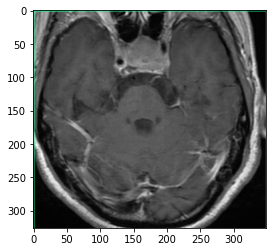

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
path1 = os.path.join("/content/gdrive/MyDrive/TheCodingBug/yolov7/runs/detect/exp2/labels/")
print(path1)

import re
path=path1+"3.0_1310.txt" 
image_path="/content/gdrive/MyDrive/TheCodingBug/yolov7/runs/detect/exp2/"+"3.0_1310.png"
myfile=open(path,'r')
lines=myfile.readlines()
pattern= "Chest"
#print("lines:")
#print(lines)
img = cv2.imread(image_path)
for line in lines:
  #if re.search(pattern,line):
  
  print(line)
  print(type(line))

  
  #Cord=Cord_Raw.split("(")[1].split(")")[0].split()
  Cord=line.split(' ')
  #print(Cord)
  #if (int(Cord[1])<0): Cord[1]='0'
  #if (int(Cord[3])<0): Cord[3]='0'
  """x_min=float(Cord[1])
  x_max=x_min + float(Cord[3])
  y_min=float(Cord[2])
  y_max=y_min+ float(Cord[4])"""

  x_min=float(Cord[1])-(float(Cord[3])/2)  #merkez nokta x-width/2
  x_max=float(Cord[1])+(float(Cord[3])/2)  #merkez nokta x+width/2
  y_min=float(Cord[2])-(float(Cord[4])/2)  #merkez nokta y-heigth/2
  y_max=float(Cord[2])+(float(Cord[4])/2) #merkez nokta y+2heigth/2
  image_size=512
  crop_img = img[int(y_min*image_size):int(y_max*image_size),int(x_min*image_size):int(x_max*image_size)]
  #crop_img = img[1:100, 1:350]

  #cv2.imwrite(os.path.join("/content/drive/My Drive/darknet1/newimg/",filename),crop_img)
  plt.imshow(crop_img)
  plt.show()
  #imShow('predictions.jpg')

.png
/content/gdrive/MyDrive/img/2.0_729.png
2.0_729.png
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=True, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='/content/gdrive/MyDrive/img/2.0_729.png', update=False, view_img=False, weights=['runs/train/yolov72/weights/last.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwa

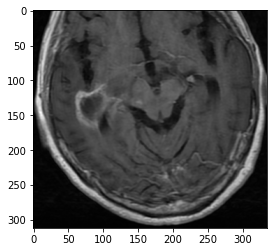

0 0.479492 0.580078 0.654297 0.609375

<class 'str'>


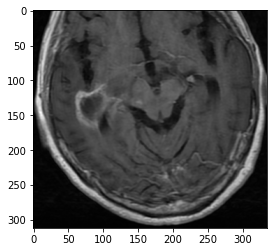

0 0.479492 0.580078 0.654297 0.609375

<class 'str'>


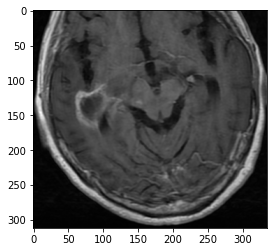

.png
/content/gdrive/MyDrive/img/2.0_738.png
2.0_738.png
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=True, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='/content/gdrive/MyDrive/img/2.0_738.png', update=False, view_img=False, weights=['runs/train/yolov72/weights/last.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwa

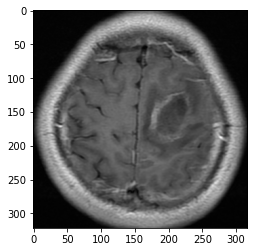

0 0.486328 0.527344 0.617188 0.628906

<class 'str'>


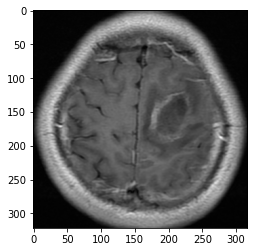

0 0.486328 0.527344 0.617188 0.628906

<class 'str'>


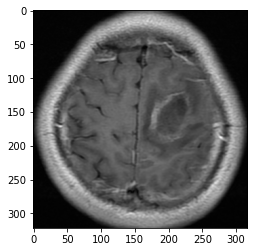

.png
/content/gdrive/MyDrive/img/2.0_736.png
2.0_736.png
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=True, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='/content/gdrive/MyDrive/img/2.0_736.png', update=False, view_img=False, weights=['runs/train/yolov72/weights/last.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwa

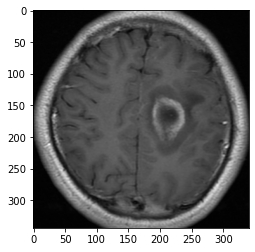

0 0.485352 0.525391 0.666016 0.671875

<class 'str'>


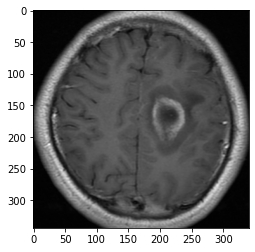

0 0.485352 0.525391 0.666016 0.671875

<class 'str'>


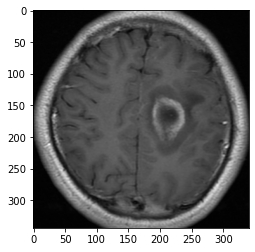

.png
/content/gdrive/MyDrive/img/2.0_737.png
2.0_737.png
Traceback (most recent call last):
  File "detect.py", line 10, in <module>
  File "/content/gdrive/MyDrive/TheCodingBug/yolov7/models/experimental.py", line 6, in <module>
    from models.common import Conv, DWConv
  File "/content/gdrive/MyDrive/TheCodingBug/yolov7/models/common.py", line 17, in <module>
    from utils.plots import color_list, plot_one_box
  File "/content/gdrive/MyDrive/TheCodingBug/yolov7/utils/plots.py", line 15, in <module>
    import seaborn as sns
  File "/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py", line 2, in <module>
    from .rcmod import *  # noqa: F401,F403
  File "/usr/local/lib/python3.7/dist-packages/seaborn/rcmod.py", line 7, in <module>
    from . import palettes
  File "/usr/local/lib/python3.7/dist-packages/seaborn/palettes.py", line 9, in <module>
    from .utils import desaturate, get_color_cycle
  File "/usr/local/lib/python3.7/dist-packages/seaborn/utils.py", line 10, in <m

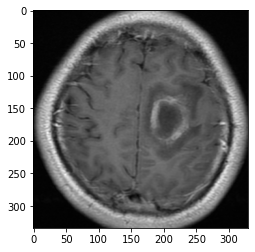

0 0.482422 0.525391 0.644531 0.652344

<class 'str'>


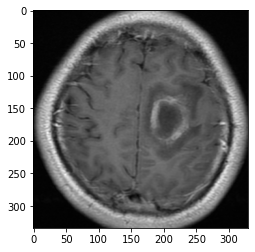

.png
/content/gdrive/MyDrive/img/2.0_733.png
2.0_733.png
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=True, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='/content/gdrive/MyDrive/img/2.0_733.png', update=False, view_img=False, weights=['runs/train/yolov72/weights/last.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
Traceback (most recent call last):
  File "detect.py", line 205, in <module>
    detect()
  File "detect.py", line 39, in detect
    model = TracedModel(model, device, opt.img_size)
  File "/content/gdrive/MyDrive/TheCodingBug/yolov7/utils/torch_utils.py", line 362, in __init__
    traced_script_module = torch.jit.trace(self.

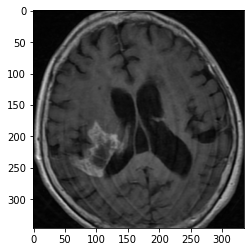

.png
/content/gdrive/MyDrive/img/2.0_734.png
2.0_734.png
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=True, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='/content/gdrive/MyDrive/img/2.0_734.png', update=False, view_img=False, weights=['runs/train/yolov72/weights/last.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
Traceback (most recent call last):
  File "detect.py", line 205, in <module>
    detect()
  File "detect.py", line 39, in detect
    model = TracedModel(model, device, opt.img_size)
  File "/content/gdrive/MyDrive/TheCodingBug/yolov7/utils/torch_utils.py", line 362, in __init__
    traced_script_module = torch.jit.trace(self.

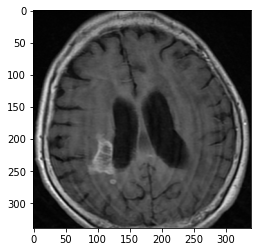

.png
/content/gdrive/MyDrive/img/1.0_74.png
1.0_74.png
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=True, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='/content/gdrive/MyDrive/img/1.0_74.png', update=False, view_img=False, weights=['runs/train/yolov72/weights/last.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
Traceback (most recent call last):
  File "detect.py", line 205, in <module>
  File "detect.py", line 39, in detect
    model = TracedModel(model, device, opt.img_size)
  File "/content/gdrive/MyDrive/TheCodingBug/yolov7/utils/torch_utils.py", line 362, in __init__
    traced_script_module = torch.jit.trace(self.model, rand_exam

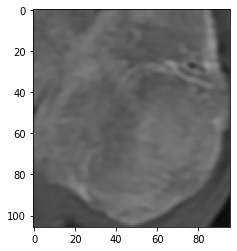

0 0.488281 0.459961 0.1875 0.208984

<class 'str'>


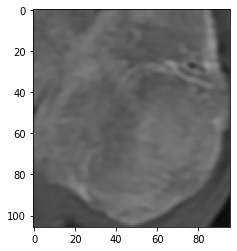

.png
/content/gdrive/MyDrive/img/2.0_743.png
2.0_743.png
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=True, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='/content/gdrive/MyDrive/img/2.0_743.png', update=False, view_img=False, weights=['runs/train/yolov72/weights/last.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
Traceback (most recent call last):
  File "detect.py", line 205, in <module>
  File "detect.py", line 39, in detect
    model = TracedModel(model, device, opt.img_size)
  File "/content/gdrive/MyDrive/TheCodingBug/yolov7/utils/torch_utils.py", line 362, in __init__
    traced_script_module = torch.jit.trace(self.model, rand_e

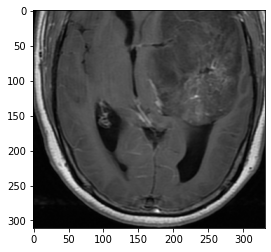

0 0.482422 0.389648 0.628906 0.525391

<class 'str'>


KeyboardInterrupt: ignored

In [23]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
path=os.path.join("/content/gdrive/MyDrive/TheCodingBug/yolov7/runs/detect/exp/labels/")
image_path=""
path1 = os.path.join("/content/gdrive/MyDrive/img")
for filename in os.listdir(path1):
  if (os.path.splitext(filename)[1]!=".txt"):
    image_path = os.path.join(path1, filename)
    print(os.path.splitext(filename)[1])
    print(image_path)  
    print(filename)  
    img = cv2.imread(image_path)
    #--exist-ok sonuçlar tek klasöre runs/detect/exp klasörüne kopyalanır
    #--source "$image_path" detect yapılacak resimleri bulunduğu klasör
    #--save-txt elde edilen bölge koordinatları runs/detect/exp/labels klasörüne kopyalanır.
    !python detect.py --save-txt --conf 0.1 --weights runs/train/yolov72/weights/last.pt --source "$image_path" --exist-ok 
    import re
    resultpath=path+os.path.splitext(filename)[0]+".txt" 
    myfile=open(resultpath,'r')
    lines=myfile.readlines()  
    for line in lines:    
      print(line)
      print(type(line))  
      Cord=line.split(' ')
      x_min=float(Cord[1])-(float(Cord[3])/2)  #merkez nokta x-width/2
      x_max=float(Cord[1])+(float(Cord[3])/2)  #merkez nokta x+width/2
      y_min=float(Cord[2])-(float(Cord[4])/2)  #merkez nokta y-heigth/2
      y_max=float(Cord[2])+(float(Cord[4])/2) #merkez nokta y+2heigth/2
      image_size=512
      crop_img = img[int(y_min*image_size):int(y_max*image_size),int(x_min*image_size):int(x_max*image_size)]
      cv2.imwrite(os.path.join("/content/gdrive/MyDrive/cropedimage/",filename),crop_img)
      plt.imshow(crop_img)
      plt.show()
      #imShow('predictions.jpg')

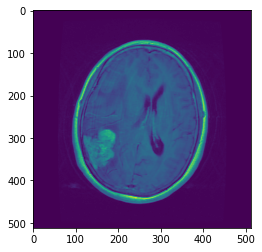

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("/content/gdrive/MyDrive/img/1.0_105.png"))